##  ロジスティック回帰

In [9]:
from sklearn import datasets
import numpy as np

# Irisデータセットをロード
iris = datasets.load_iris()

# 3, 4列目の特徴量を抽出
x = iris.data[:, [2, 3]]

# クラスラベルを取得
y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [17]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# トレーニングデータとテストデータ二分割
# 全体の30%をテストデータとする
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を１次元配列に変換して予測を実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドんポイントのデータサイズに変換
    z = z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

In [20]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))

# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))

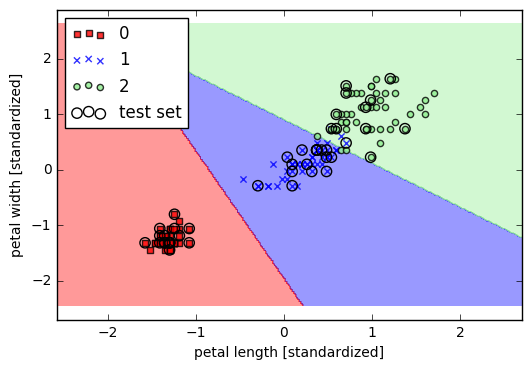

In [21]:
from sklearn.linear_model import LogisticRegression
# ↑このlinear_modelはlinear(リニア)　-> 線形のモデルということ

# ロジスティック回帰のインスタンスを生成
# C: 逆 正則 化 パラメータ C（ 正則 化 パラメータ λ の 逆数）　- 近づきすぎると離れている値に反応しなくなるので、近づいたら離す。
# random_state
lr = LogisticRegression(C=1000.0, random_state=0)

# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105, 150))

# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

In [26]:
# lr.predict_proba(X_test_std[0, :])
lr.predict_proba(X_test_std[0, :].reshape(1, -1))


array([[  1.32305547e-14,   6.29676452e-02,   9.37032355e-01]])

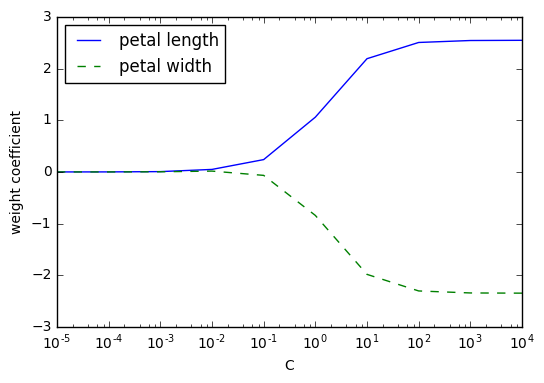

In [27]:
# 空リストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []

# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    
    # 重み係数を格納
    weights.append(lr.coef_[1])
    
    # 逆正則化パラメータを格納
    params.append(10**c)

# 重み係数をNumPy配列に変換
weights = np.array(weights)

# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')

# 横軸を対数スケールに設定
plt.xscale('log')
plt.show()